## Forest Cover Type Prediction

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. 

### Problem Statment - You are asked to predict an integer classification for the forest cover type. 
The seven types are:
- 1 - Spruce/Fir
- 2 - Lodgepole Pine
- 3 - Ponderosa Pine
- 4 - Cottonwood/Willow
- 5 - Aspen
- 6 - Douglas-fir
- 7 - Krummholz
The  set (15120 observations) contains both features and the Cover_Type.

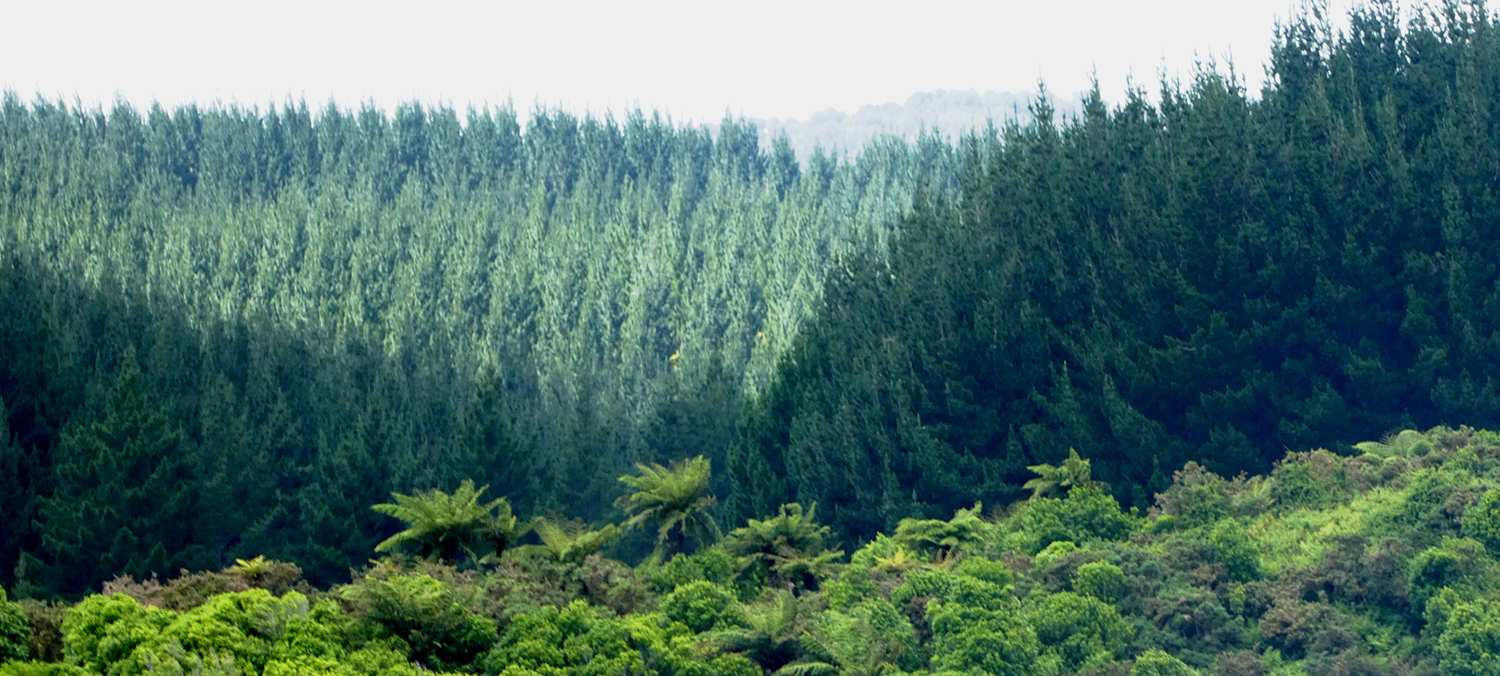

### Data Fields
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth 
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:
- Rawah Wilderness Area 
- Neota Wilderness Area 
- Comanche Peak Wilderness Area 
- Cache la Poudre Wilderness Area

The soil types are:
- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony. 
- 3 Haploborolis - Rock outcrop complex, rubbly. 
- 4 Ratake family - Rock outcrop complex, rubbly. 
- 5 Vanet family - Rock outcrop complex complex, rubbly. 
- 6 Vanet - Wetmore families - Rock outcrop complex, stony. 
- 7 Gothic family. 
- 8 Supervisor - Limber families complex. 
- 9 Troutville family, very stony. 
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly. 
- 11 Bullwark - Catamount families - Rock land complex, rubbly. 
- 12 Legault family - Rock land complex, stony. 
- 13 Catamount family - Rock land - Bullwark family complex, rubbly. 
- 14 Pachic Argiborolis - Aquolis complex. 
- 15 unspecified in the USFS Soil and ELU Survey. 
- 16 Cryaquolis - Cryoborolis complex. 
- 17 Gateview family - Cryaquolis complex. 
- 18 Rogert family, very stony. 
- 19 Typic Cryaquolis - Borohemists complex. 
- 20 Typic Cryaquepts - Typic Cryaquolls complex. 
- 21 Typic Cryaquolls - Leighcan family, till substratum complex. 
- 22 Leighcan family, till substratum, extremely bouldery. 
- 23 Leighcan family, till substratum - Typic Cryaquolls complex. 
- 24 Leighcan family, extremely stony. 
- 25 Leighcan family, warm, extremely stony. 26 Granile - Catamount families complex, very stony. 
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony. 
- 28 Leighcan family - Rock outcrop complex, extremely stony. 
- 29 Como - Legault families complex, extremely stony. 
- 30 Como family - Rock land - Legault family complex, extremely stony. 
- 31 Leighcan - Catamount families complex, extremely stony. 
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony. 
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony. 
- 34 Cryorthents - Rock land complex, extremely stony. 
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex. 
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony. 
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony. 
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony. 
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony. 
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

In [2]:
# Common libraries

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Restrict minor warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [3]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Forestcover_train.csv')

In [4]:
# First 5 data points
df.head(5)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [5]:
# Datatypes of the attributes
df.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

**Observation** - No categorical data. All are numerical

In [6]:
pd.set_option('display.max_columns', None) # we need to see all the columns
df.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000 

**Inferences**
- Count is 15120 for each column, so no data point is missing.
- Soil type 7 and 15 are constant(each value is zero), so they can be removed.
- Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis.
- Scales are not the same for all. Hence, rescaling and standardisation may be necessary for some algos.

In [7]:
# Profile Report
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="forest_cover_before_preprocessing.html")

In [8]:
data = df.copy(deep=True)

**Removing Soil_type 7 & 15**

In [9]:
data = data.drop(['Soil_Type7', 'Soil_Type15'], axis = 1)

# Also drop 'Id'
data = data.iloc[:,1:]

**Correlation matrix (heatmap)**
Correlation requires continuous data. Hence, ignore `Wilderness_Area` and `Soil_Type` as they are binary values

Text(0.5, 1, 'Correlation between features')

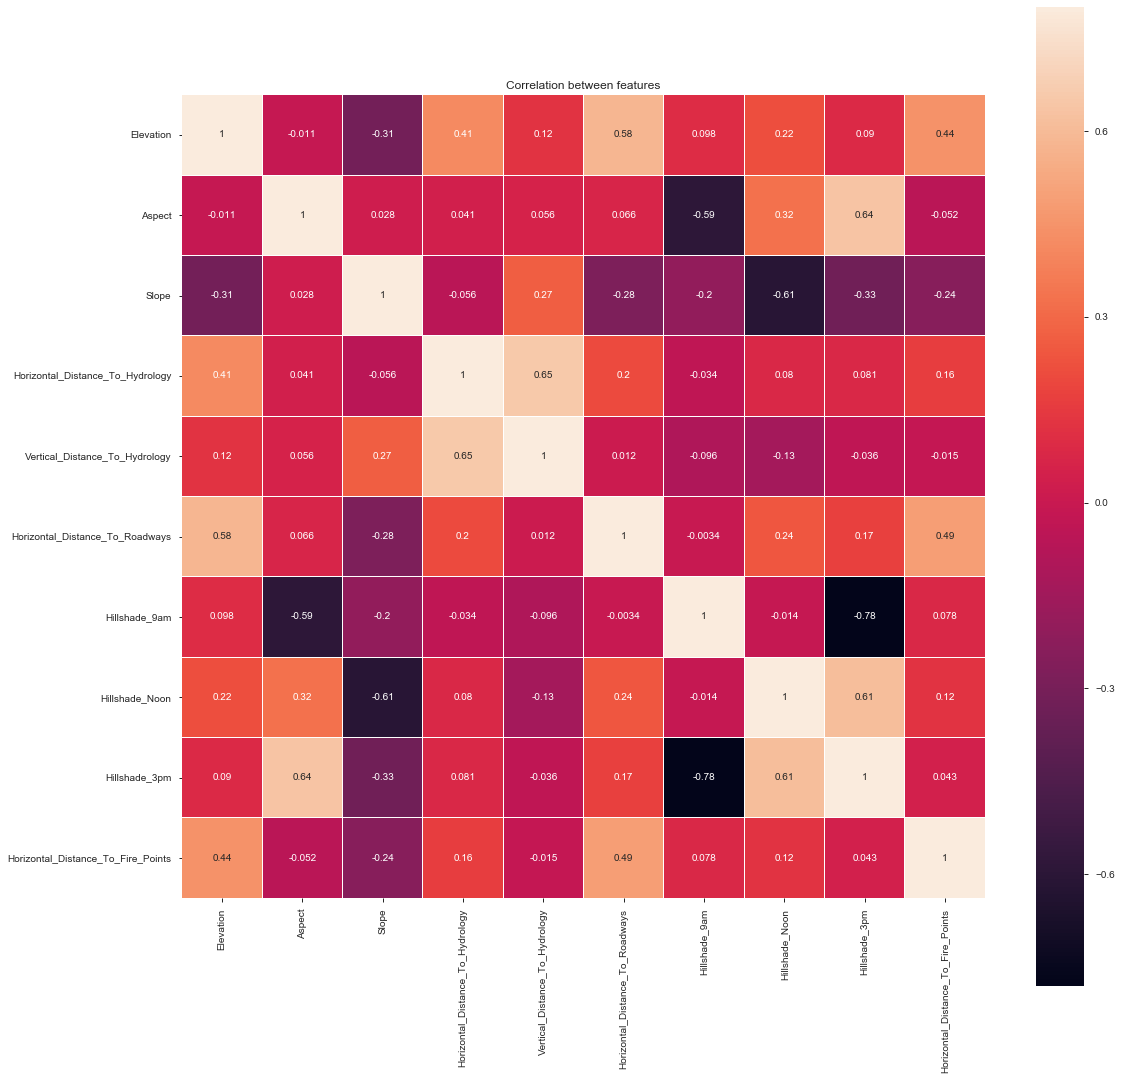

In [10]:
size = 10
corrmat = data.iloc[:,:size].corr()
plt.figure(figsize=(18,18))
sns.heatmap(corrmat,vmax=0.8,linewidth=.01,square=True,annot = True);
plt.title('Correlation between features')

**Correlation Values**

In [11]:
cor_data = data.iloc[:,:size]

# Get name of the columns
cols = cor_data.columns

# Calculate the pearson correlation coefficients for all combinations
data_corr = cor_data.corr()

# Threshold ( only highly correlated ones matter)
threshold = 0.5
corr_list = []

In [12]:
data_corr

Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                                                      0.040732   
Slope                                                      -0.055976   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.652142   
Horizontal_Distance_To_Roadways                             0.203397   
Hillshade_9am                                              -0.033803   
Hillshade_Noon                                              0.080047   
Hillshade_3pm                                               0.080833   
Horizontal_Distance_To_Fire_Points                          0.158817   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.122092   
Aspect                                                    0.056412   
Slope                                                     0.265314   
Horizontal_Distance_To_Hydrology                          0.652142   
Vertical_Distance_To_Hydrology                            1.000000   
Horizontal_Distance_To_Roadways                           0.011555   
Hillshade_9am                                            -0.095930   
Hillshade_Noon                                           -0.132948   
Hillshade_3pm                                            -0.035559   
Horizontal_Distance_To_Fire_Points                       -0.015048   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.578659   
Aspect                                                     0.066184   
Slope                                                     -0.277049   
Horizontal_Distance_To_Hydrology                           0.203397   
Vertical_Distance_To_Hydrology                             0.011555   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                             -0.003398   
Hillshade_Noon                                             0.240684   
Hillshade_3pm                                              0.173882   
Horizontal_Distance_To_Fire_Points                         0.486386   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation                                0.097900        0.215782   
Aspect                                  -0.593997        0.324912   
Slope                                   -0.200072       -0.612613   
Horizontal_Distance_To_Hydrology        -0.033803        0.080047   
Vertical_Distance_To_Hydrology          -0.095930       -0.132948   
Horizontal_Distance_To_Roadways         -0.003398        0.240684   
Hillshade_9am                            1.000000       -0.013712   
Hillshade_Noon                          -0.013712        1.000000   
Hillshade_3pm                           -0.779965        0.614526   
Horizontal_Distance_To_Fire_Points       0.078144        0.122098   

                                    Hillshade_3pm  \
Elevation                                0.089518   
Aspect                                   0.635022   
Slope      

In [13]:
# Sorting out the highly correlated values
for i in range(0, size):
    for j in range(i+1, size):
        if data_corr.iloc[i,j]>= threshold and data_corr.iloc[i,j]<1\
        or data_corr.iloc[i,j] <0 and data_corr.iloc[i,j]<=-threshold:
            corr_list.append([data_corr.iloc[i,j],i,j])

In [14]:
# Sorting the values
s_corr_list = sorted(corr_list,key= lambda x: -abs(x[0]))

# print the higher values
for v,i,j in s_corr_list:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


**Skewness**

In [15]:
data.iloc[:,:10].skew()

Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Roadways       1.247811
Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Horizontal_Distance_To_Fire_Points    1.617099
dtype: float64

**Observation** - Presence of skewness can easily be noticed

**Data Visualisation**

<Figure size 1296x1296 with 0 Axes>

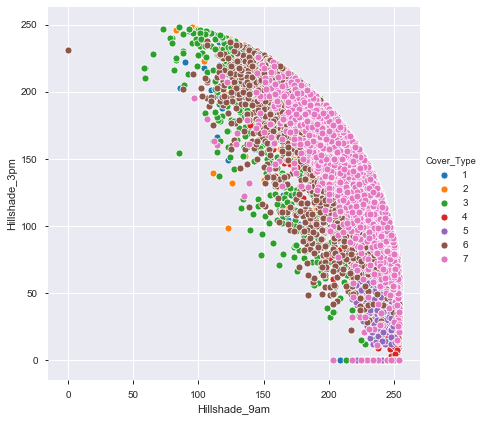

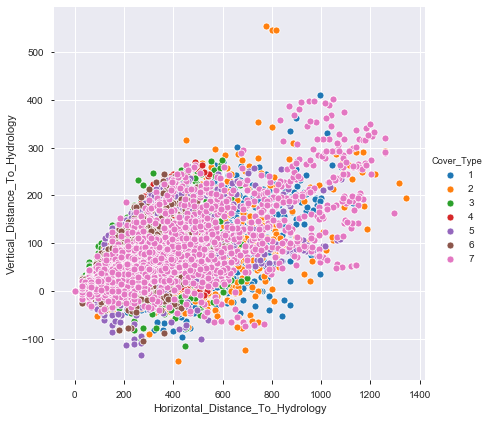

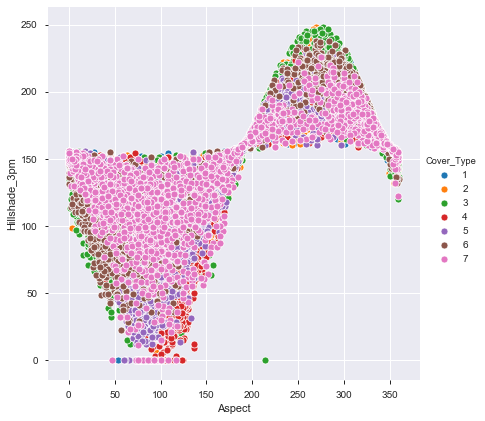

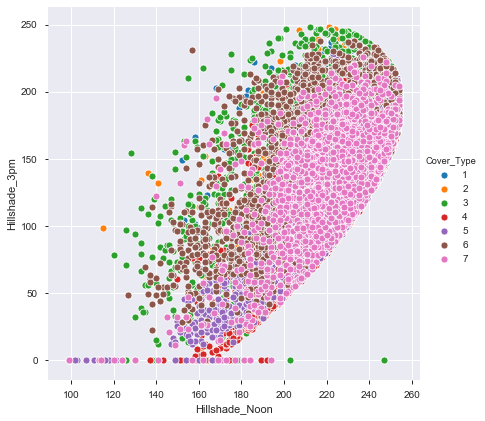

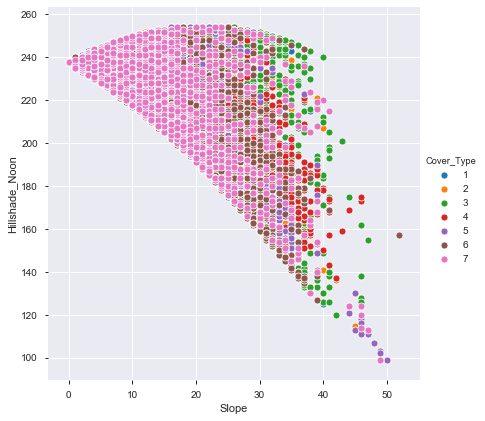

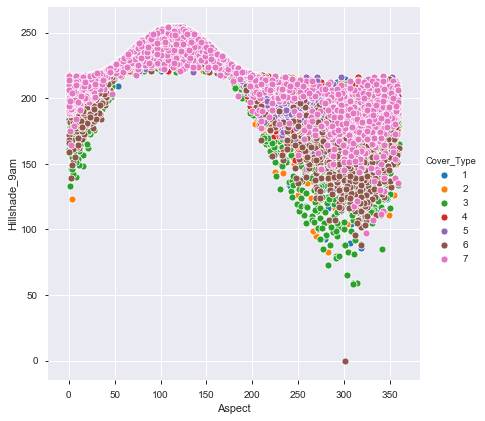

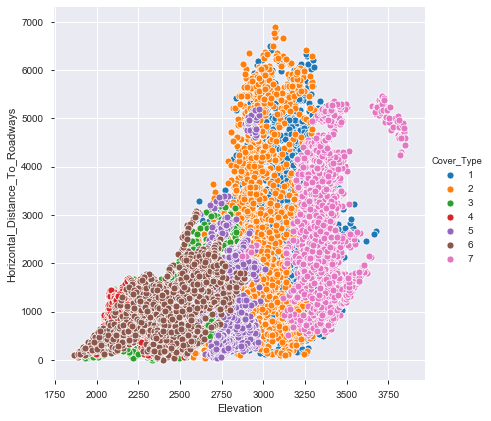

In [16]:
# Pair wise scatter plot with hue being 'Cover_Type'
plt.figure(figsize=(18,18))
for v,i,j in s_corr_list:
    sns.pairplot(data = data, hue='Cover_Type', size= 6, x_vars=cols[i], y_vars=cols[j])
    plt.show()

- Horizontal and vertical distance to hydrology seems to have a linear relation
- Hillside and Aspect seems to have a sigmoid relation

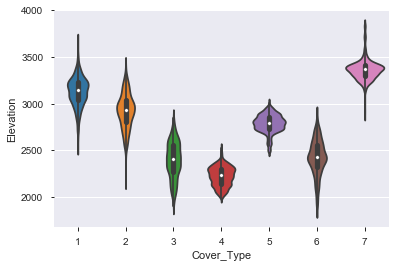

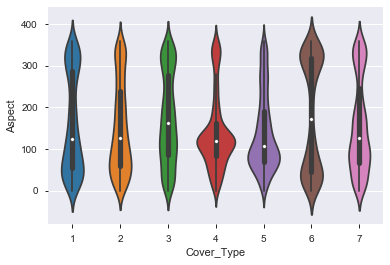

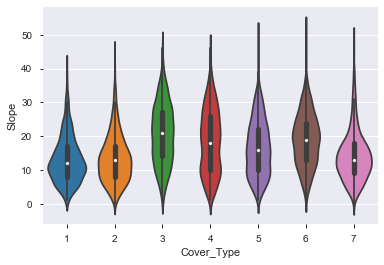

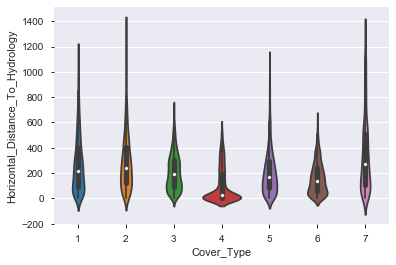

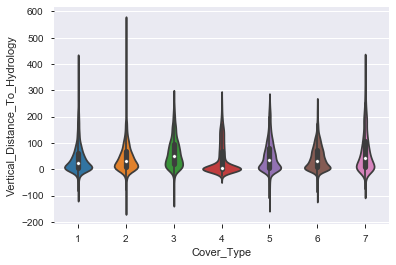

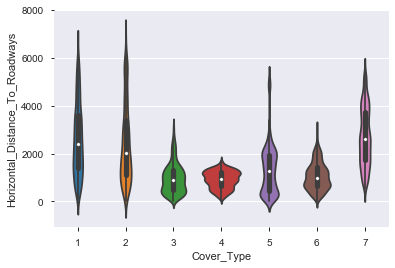

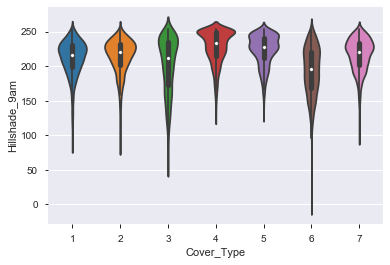

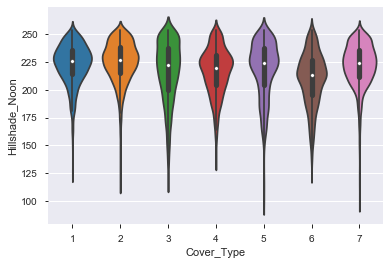

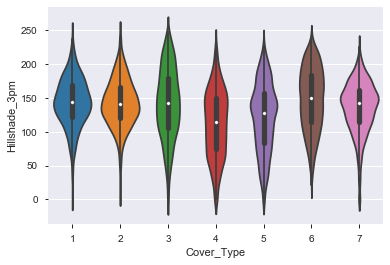

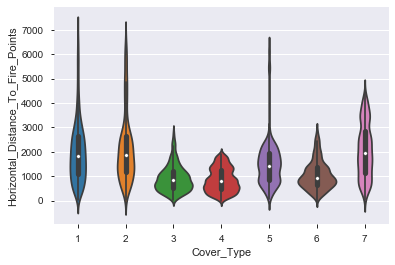

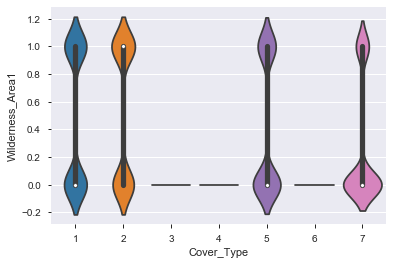

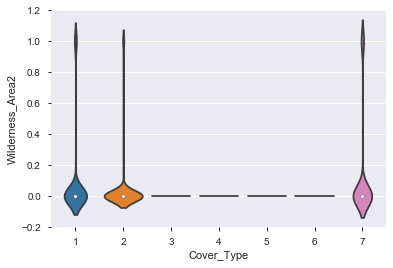

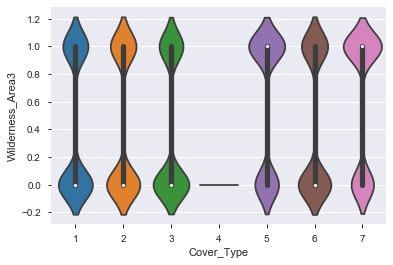

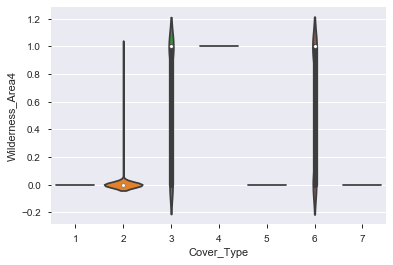

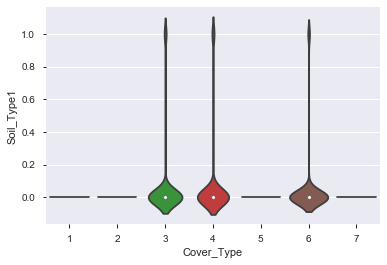

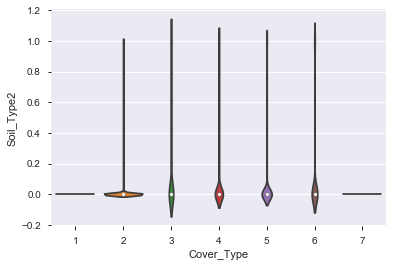

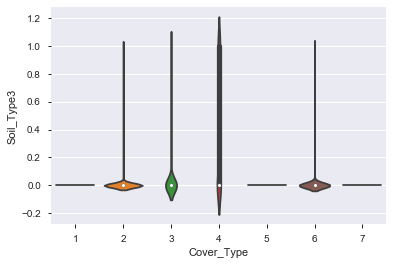

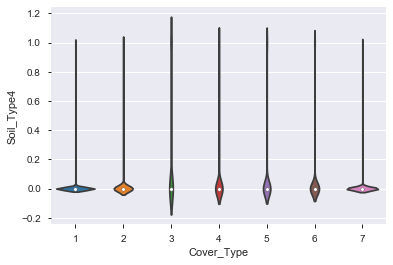

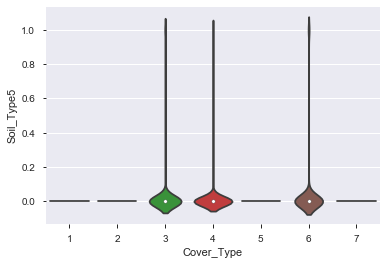

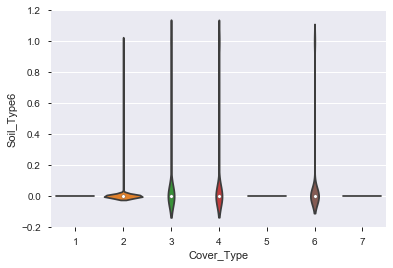

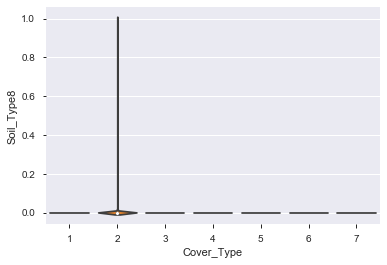

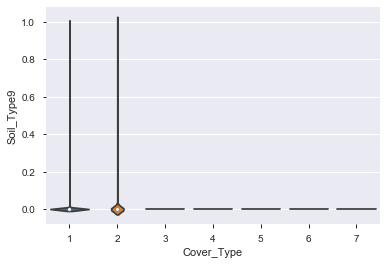

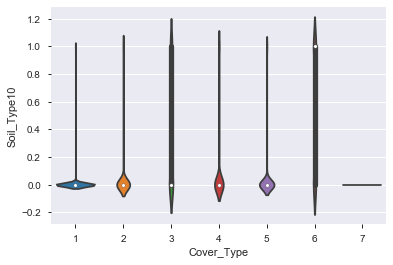

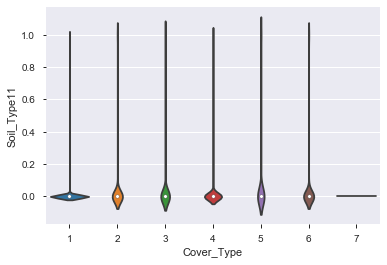

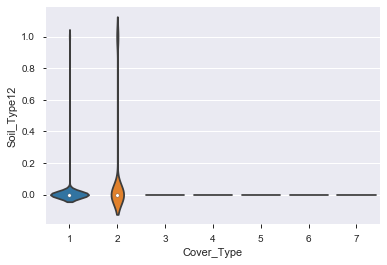

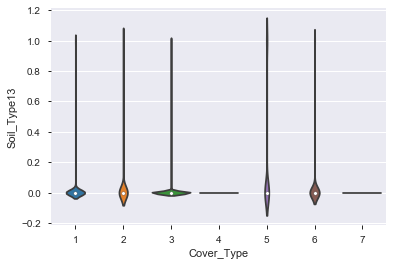

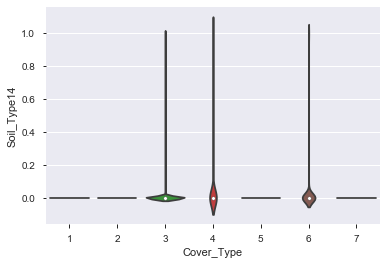

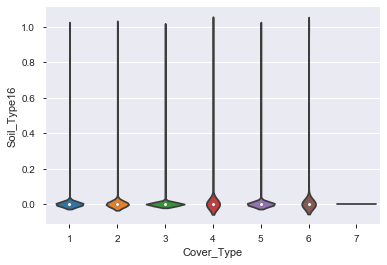

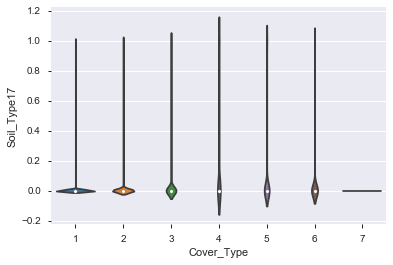

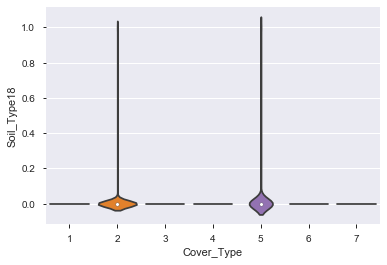

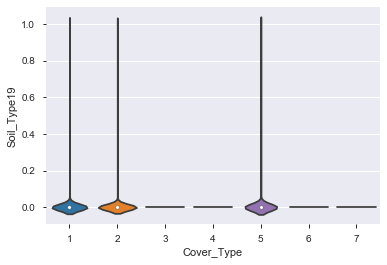

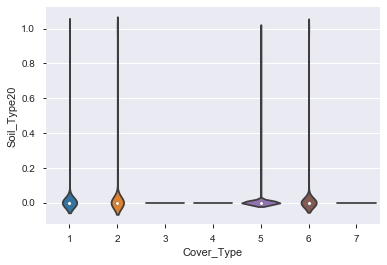

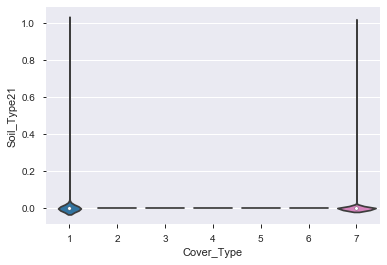

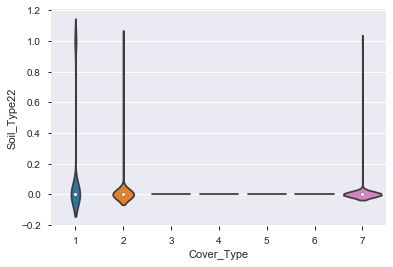

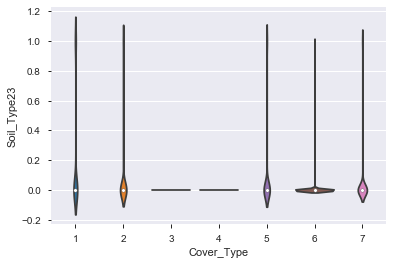

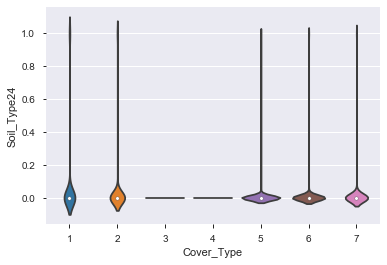

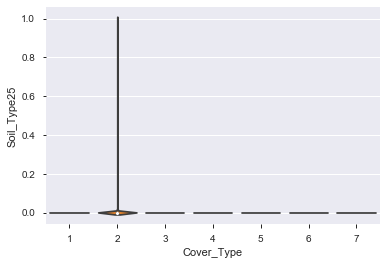

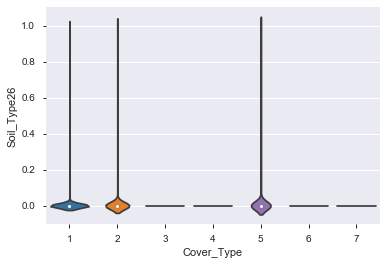

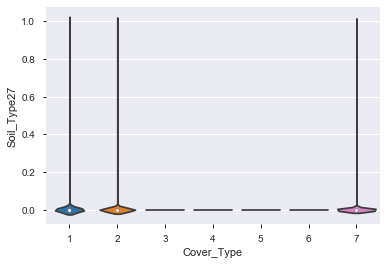

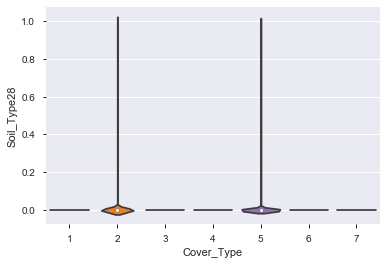

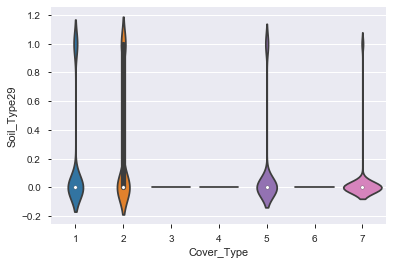

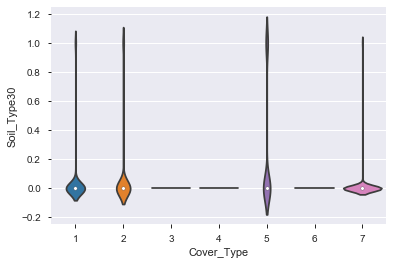

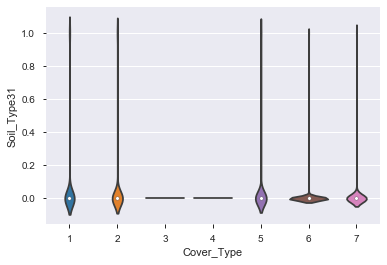

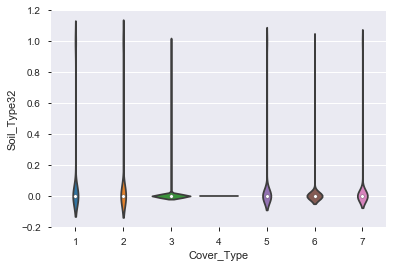

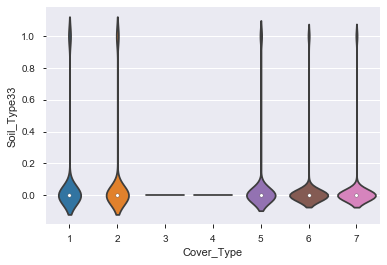

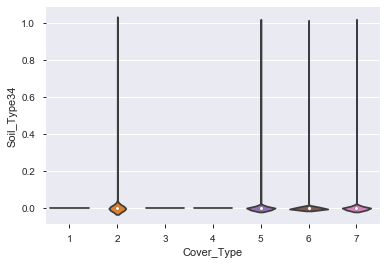

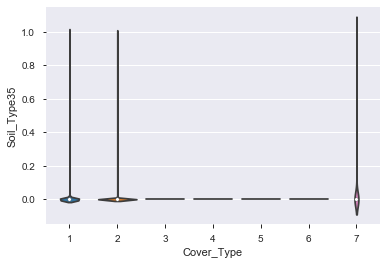

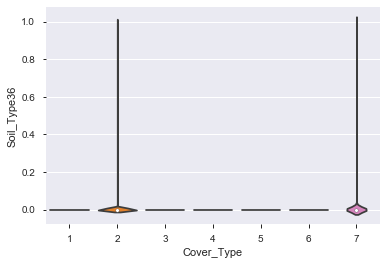

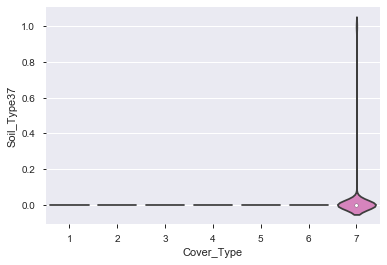

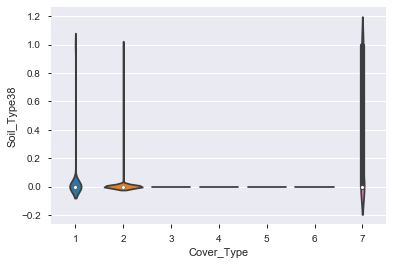

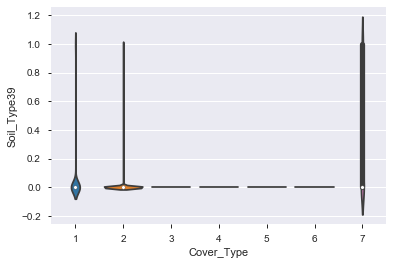

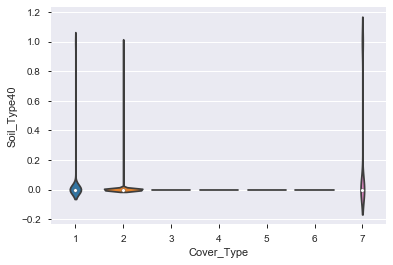

In [17]:
# A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.
cols = data.columns
size = len(cols) - 1 # We don't need the target attribute
# x-axis has target attributes to distinguish between classes
x = cols[size]
y = cols[0:size]

#plt.figure(figsize=(18,18))
for i in range(0, size):
    sns.violinplot(data=data, x=x, y=y[i])
    plt.show()

**Observations**
- `Elevation` has a seperate distribution for each class, hence an important attribute for prediction
- `Aspect` plot contains couple of normal distribution for several classes
- `Horizontal distance to Hydrology` and `Horizontal distance to Roadways` is quite similar
- `Hillshade 9am` and `Hillshade 12pm` displays left skew (long tail towards left)
- `Wilderness_Area3` gives no class distinction. As values are not present, others give some scope to distinguish
- `Soil_Type` 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes

In [17]:
data.Wilderness_Area2.value_counts()

0    14621
1      499
Name: Wilderness_Area2, dtype: int64

Too many zero values means attributes like it shows class distinction

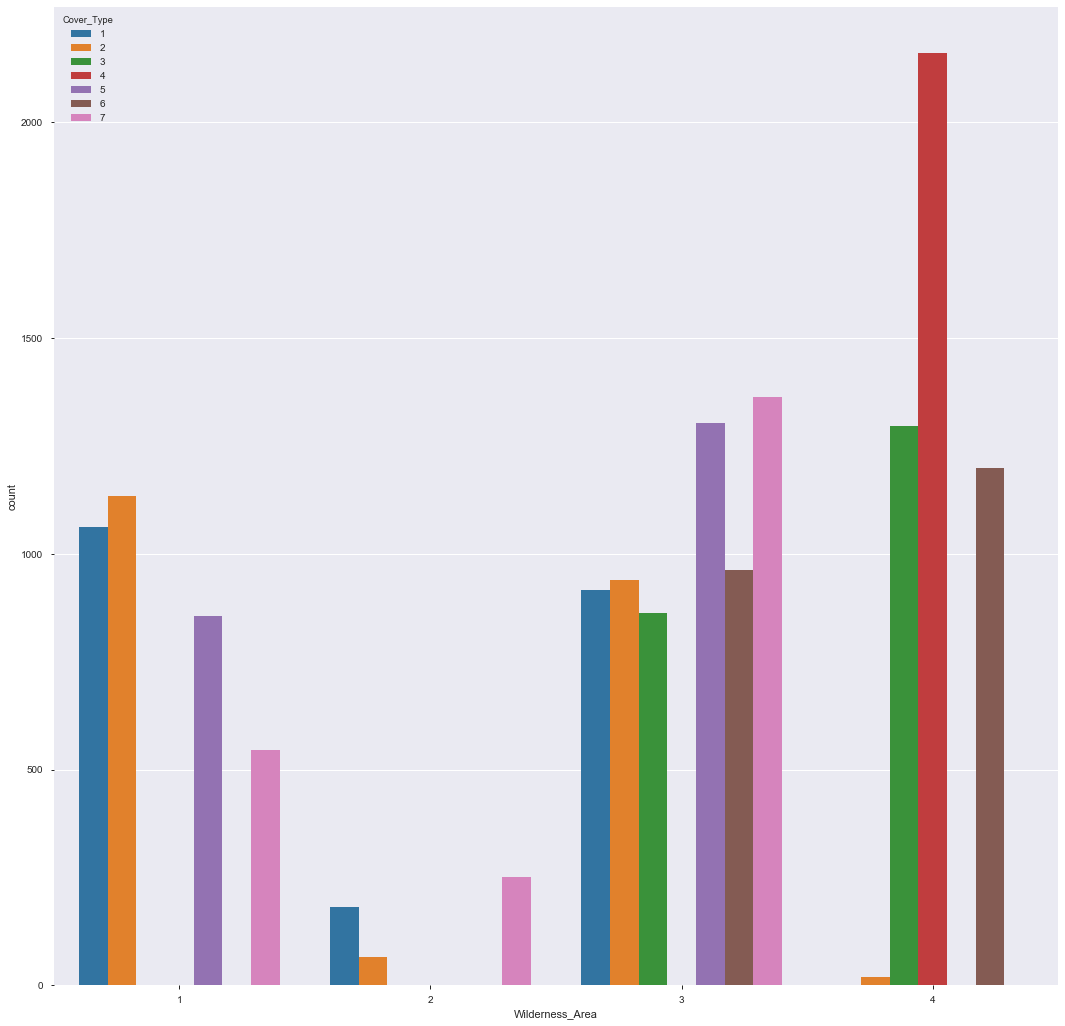

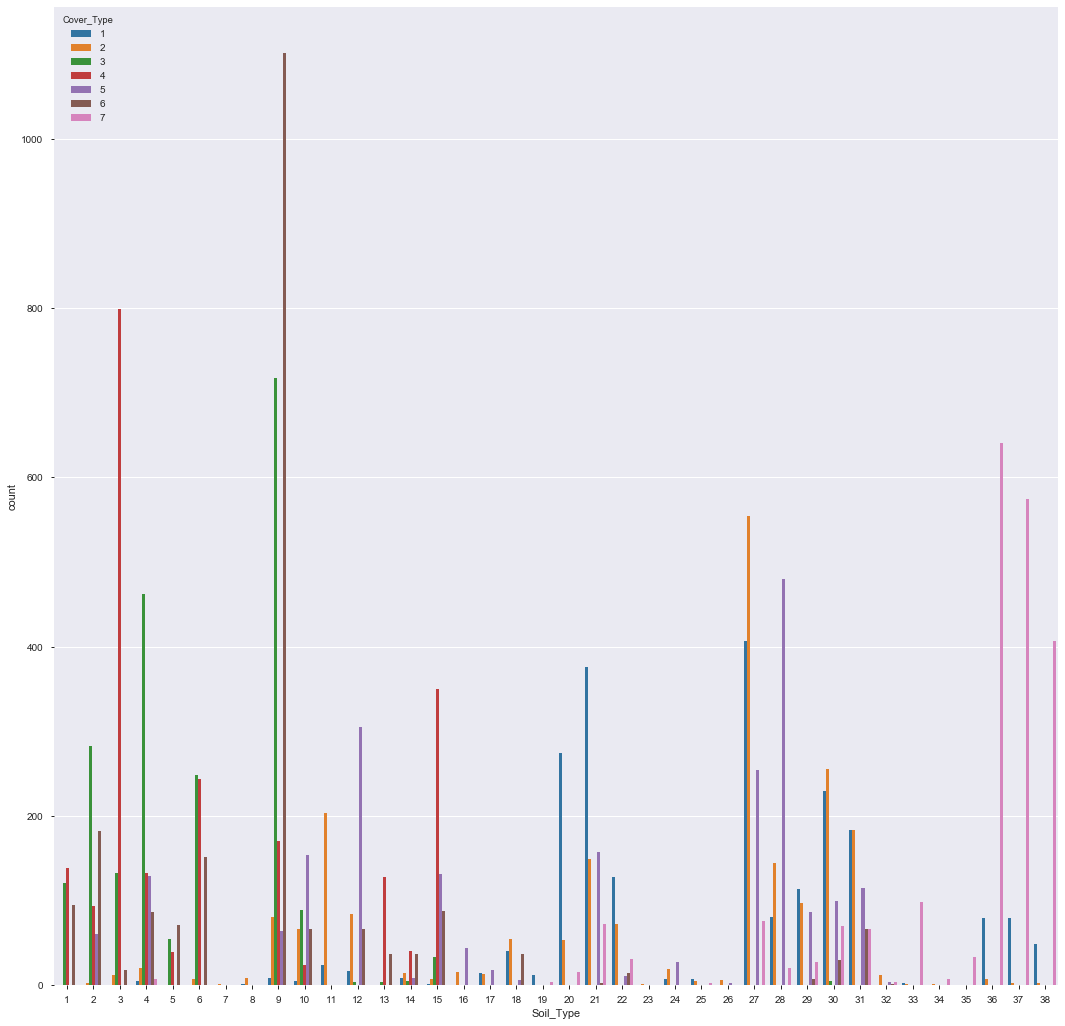

In [18]:
cols = data.columns
r,c = data.shape

# Create a new dataframe with r rows, one column for each encoded category, and target in the end
new_data = pd.DataFrame(index= np.arange(0,r), columns=['Wilderness_Area', 'Soil_Type', 'Cover_Type'])

# Make an entry in data for each r for category_id, target_value
for i in range(0,r):
    p = 0;
    q = 0;
    # Category1_range
    for j in range(10,14):
        if (data.iloc[i,j] == 1):
            p = j-9 # category_class
            break
    # Category2_range
    for k in range(14,54):
        if (data.iloc[i,k] == 1):
            q = k-13 # category_class
            break
    # Make an entry in data for each r
    new_data.iloc[i] = [p,q,data.iloc[i, c-1]]
    
# plot for category1
plt.figure(figsize=(18,18))
sns.countplot(x = 'Wilderness_Area', hue = 'Cover_Type', data = new_data)
plt.show()

# Plot for category2
plt.figure(figsize=(18,18))
plt.rc("figure", figsize = (25,10))
sns.countplot(x='Soil_Type', hue = 'Cover_Type', data= new_data)
plt.show()

- Wilderness_Area4 has lot of presence of cover_type 4, good class distinction
- SoilType 1-6,9-13,15, 20-22, 27-31,35,36-38 offer lot of class distinction as counts for some are very high

In [19]:
# Checking the value count for different soil_types
for i in range(10, data.shape[1]-1):
    j = data.columns[i]
    print (data[j].value_counts())

0    11523
1     3597
Name: Wilderness_Area1, dtype: int64
0    14621
1      499
Name: Wilderness_Area2, dtype: int64
0    8771
1    6349
Name: Wilderness_Area3, dtype: int64
0    10445
1     4675
Name: Wilderness_Area4, dtype: int64
0    14765
1      355
Name: Soil_Type1, dtype: int64
0    14497
1      623
Name: Soil_Type2, dtype: int64
0    14158
1      962
Name: Soil_Type3, dtype: int64
0    14277
1      843
Name: Soil_Type4, dtype: int64
0    14955
1      165
Name: Soil_Type5, dtype: int64
0    14470
1      650
Name: Soil_Type6, dtype: int64
0    15119
1        1
Name: Soil_Type8, dtype: int64
0    15110
1       10
Name: Soil_Type9, dtype: int64
0    12978
1     2142
Name: Soil_Type10, dtype: int64
0    14714
1      406
Name: Soil_Type11, dtype: int64
0    14893
1      227
Name: Soil_Type12, dtype: int64
0    14644
1      476
Name: Soil_Type13, dtype: int64
0    14951
1      169
Name: Soil_Type14, dtype: int64
0    15006
1      114
Name: Soil_Type16, dtype: int64
0    14508
1      

In [20]:
# Let's drop them
data = data.drop(['Soil_Type8', 'Soil_Type25'], axis=1)
data1 = data # To be used for algos like SVM where we need normalization and StandardScaler

**Normality
(Needed only for few ML algorithms like SVM)**

In [21]:
# Checking for data transformation (take only non-categorical values)
data.iloc[:,:10].skew()

Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Roadways       1.247811
Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Horizontal_Distance_To_Fire_Points    1.617099
dtype: float64

Data transformation needed in: `Horizontal_Distance_To_Hydrology`,`Vertical_Distance_To_Hydrology`
`Horizontal_Distance_To_Roadways`,`Hillshade_9am` & `Hillshade_Noon`

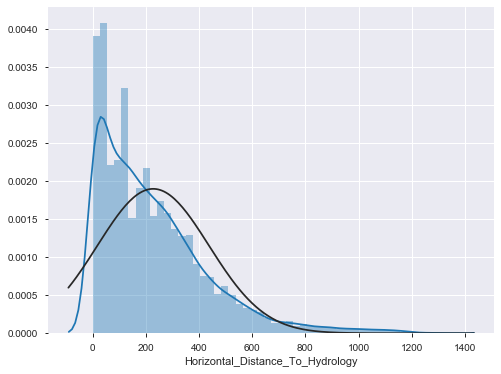

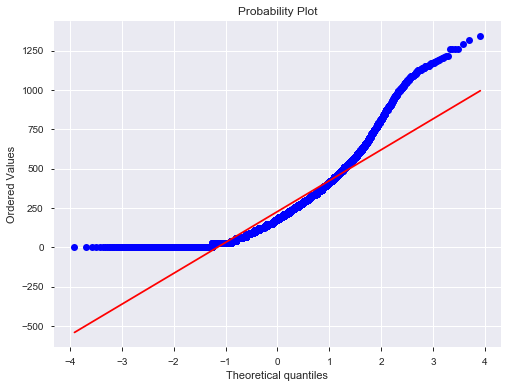

In [22]:
#Horizontal_Distance_To_Hydrology
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data1['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Horizontal_Distance_To_Hydrology'], plot=plt)

**Observation** It shows positive skewness (log or squared transformations will be a good option)

In [23]:
data1['Horizontal_Distance_To_Hydrology'] = np.sqrt(data1['Horizontal_Distance_To_Hydrology'])

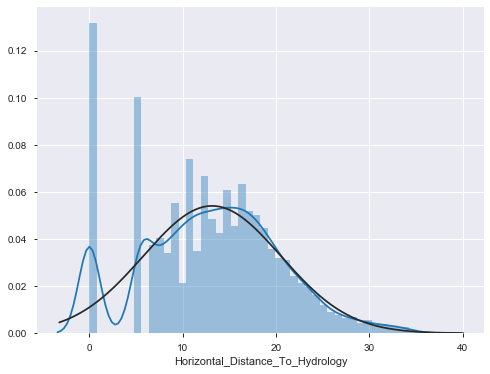

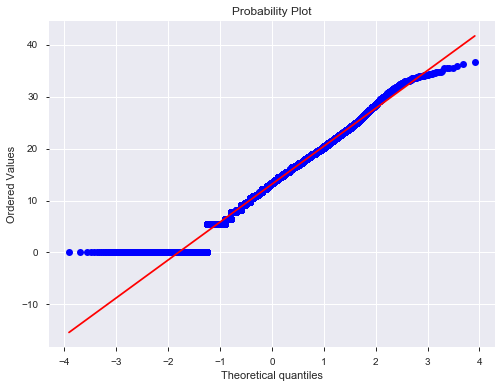

In [24]:
# Plot again after sqrt transformation
plt.figure(figsize=(8,6))
sns.distplot(data1['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Horizontal_Distance_To_Hydrology'], plot=plt)

I also performed log transformation but squared one gives better result

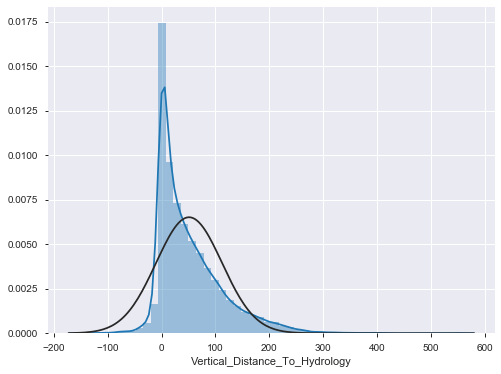

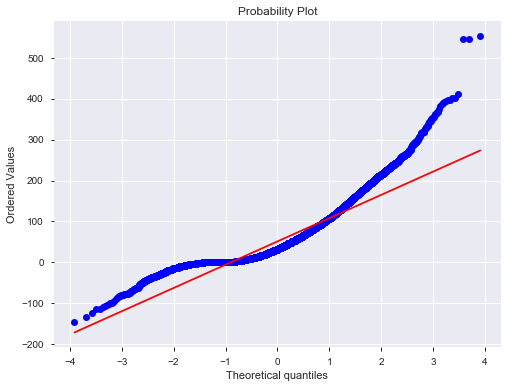

In [25]:
#Vertical_Distance_To_Hydrology
plt.figure(figsize=(8,6))
sns.distplot(data1['Vertical_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Vertical_Distance_To_Hydrology'], plot=plt)

**Observation** Shows positive skewness

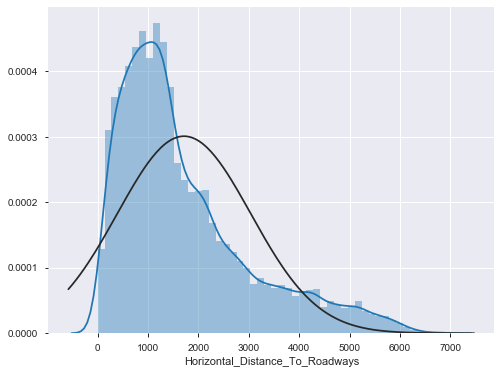

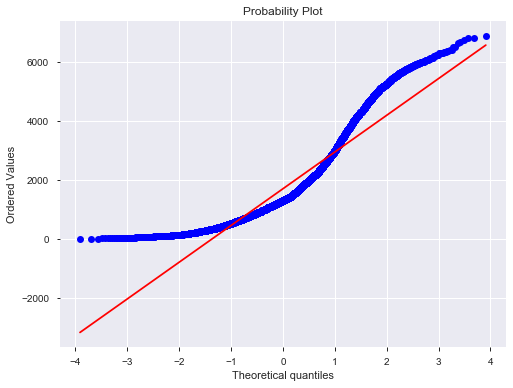

In [26]:
#Horizontal_Distance_To_Roadways
plt.figure(figsize=(8,6))
sns.distplot(data1['Horizontal_Distance_To_Roadways'], fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Horizontal_Distance_To_Roadways'], plot=plt)

**Observation** Shows positive skewness

In [27]:
data1['Horizontal_Distance_To_Roadways'] = np.sqrt(data1['Horizontal_Distance_To_Roadways'])

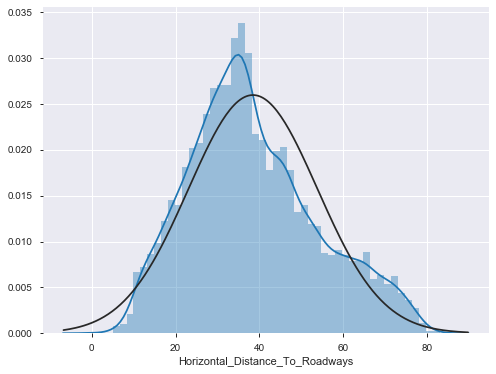

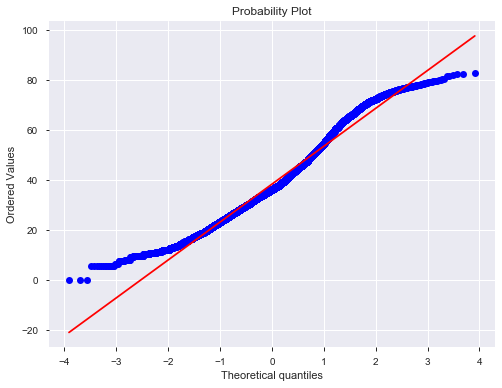

In [28]:
# Plot again after sqrt transformation
plt.figure(figsize=(8,6))
sns.distplot(data1['Horizontal_Distance_To_Roadways'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Horizontal_Distance_To_Roadways'], plot=plt)

**Observation** Reasonable improvement noticed

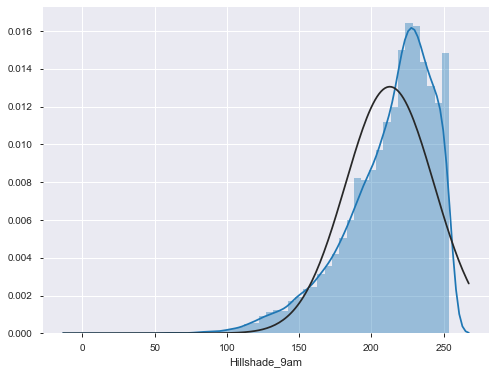

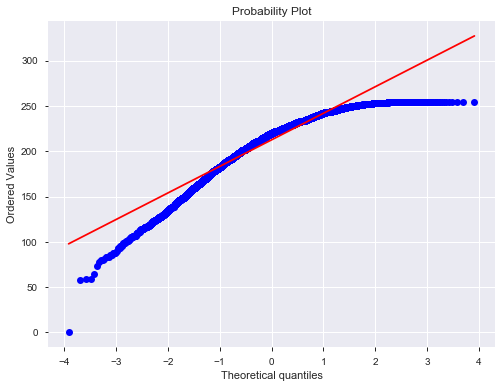

In [29]:
#Hillshade_9am
fig = plt.figure(figsize=(8,6))
sns.distplot(data1['Hillshade_9am'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Hillshade_9am'],plot=plt)

**Observation** Shows negative skewness

In [30]:
data1['Hillshade_9am'] = np.square(data1['Hillshade_9am'])

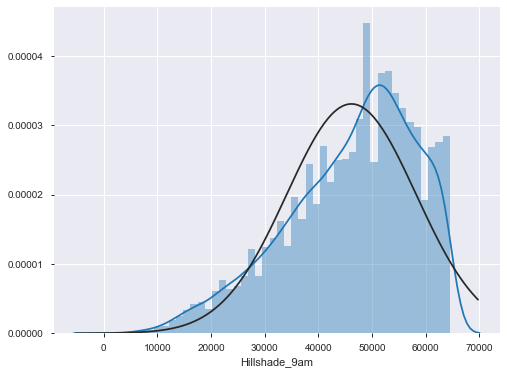

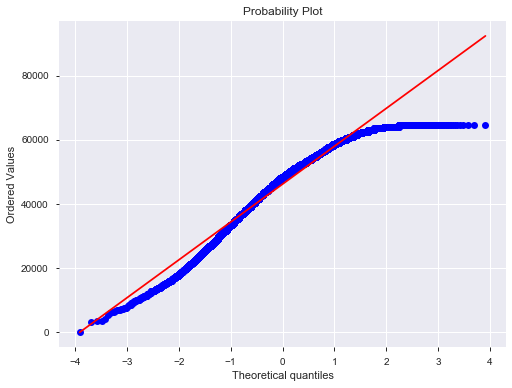

In [31]:
# Plot again after square transformation
plt.figure(figsize=(8,6))
sns.distplot(data1['Hillshade_9am'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Hillshade_9am'], plot=plt)

**Observation** Reasonable improvement seen

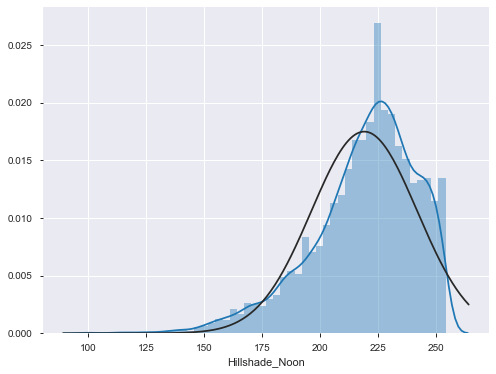

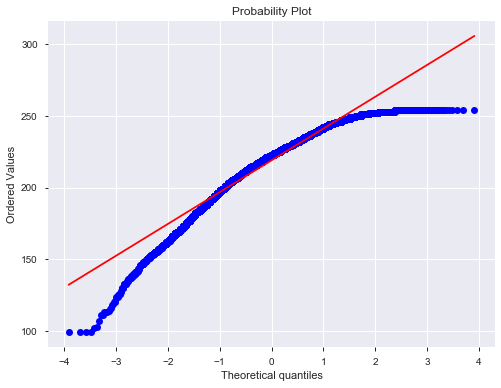

In [32]:
# Hillshade_Noon
fig = plt.figure(figsize=(8,6))
sns.distplot(data1['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Hillshade_Noon'],plot=plt)

**Observation** Negative skewness present

In [33]:
data1['Hillshade_Noon'] = np.square(data1['Hillshade_Noon'])

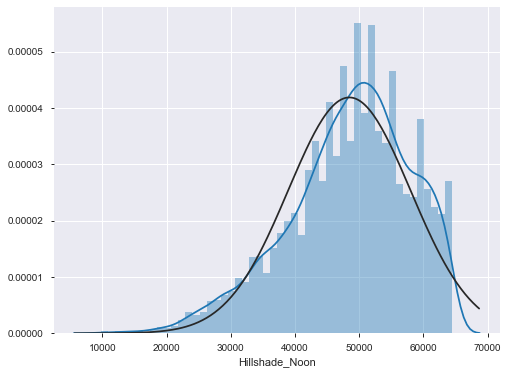

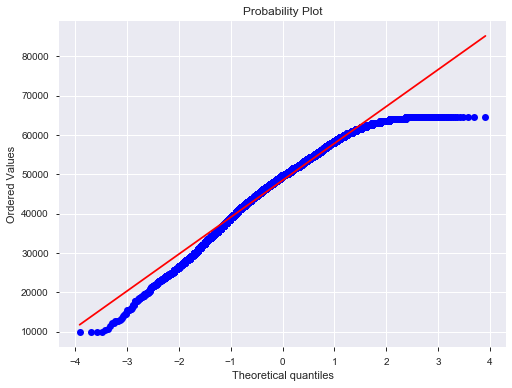

In [34]:
fig = plt.figure(figsize=(8,6))
sns.distplot(data1['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(data1['Hillshade_Noon'],plot=plt)

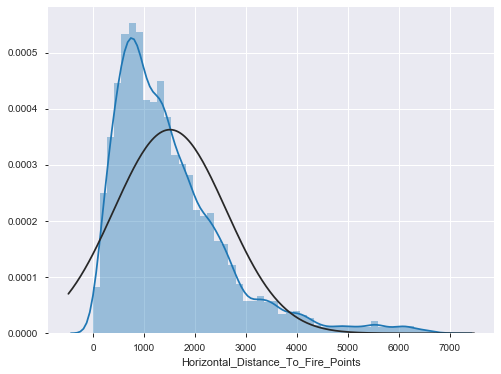

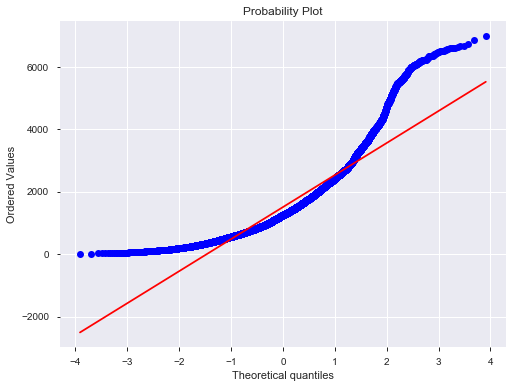

In [35]:
# Horizontal_Distance_To_Fire_Points
plt.figure(figsize=(8,6))
sns.distplot(data1['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(8,6))
res = stats.probplot(data1['Horizontal_Distance_To_Fire_Points'],plot=plt)

**Observations** Shows positive skewness

In [36]:
data1['Horizontal_Distance_To_Fire_Points'] = np.sqrt(data1['Horizontal_Distance_To_Fire_Points'])

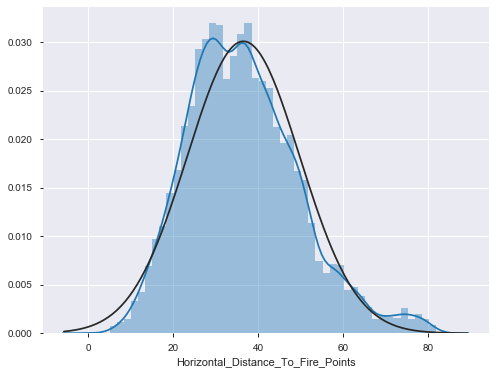

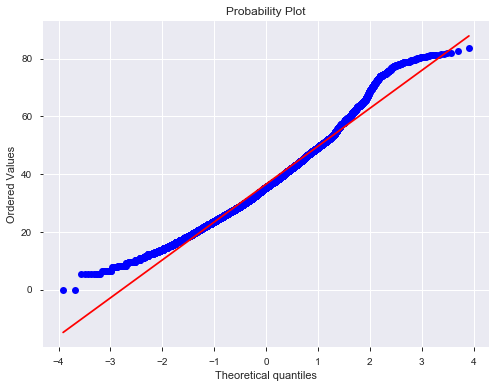

In [37]:
# Plot again after sqrt transformation
plt.figure(figsize=(8,6))
sns.distplot(data1['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(8,6))
res = stats.probplot(data1['Horizontal_Distance_To_Fire_Points'],plot=plt)

**Observation** Improvement clearly visible

In [38]:
X = data.iloc[:,:-1]
y = data['Cover_Type']

X1 = data1.iloc[:,:-1]
y1 = data1['Cover_Type']

**Train & Test Data**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2, random_state=123)

In [40]:
# Taking only non-categorical values
Size = 10
X_temp = X_train.iloc[:,:Size]
X_test_temp = X_test.iloc[:,:Size]
X_temp1 = X_train1.iloc[:,:Size]
X_test_temp1 = X_test1.iloc[:,:Size]

X_temp1 = StandardScaler().fit_transform(X_temp1)
X_test_temp1 = StandardScaler().fit_transform(X_test_temp1)

In [41]:
r,c = df.shape
Xt = np.concatenate((X_temp,X_train.iloc[:,Size:c-1]),axis=1)
Xt1 = np.concatenate((X_temp1, X_train1.iloc[:,Size:c-1]), axis=1) # to be used for SVM
yt = y_train.values

**ML Algorithm**

**SVM**

In [42]:
# Setting parameters
x_data, x_test_data, y_data, y_test_data = train_test_split(Xt1,yt,test_size=0.2, random_state=123)
svm_para = [{'kernel':['rbf'],'C': [1,10,100,100]}]

In [43]:
classifier = GridSearchCV(svm.SVC(),svm_para,cv=3,verbose=2)
classifier.fit(x_data,y_data)
classifier.best_params_
classifier.cv_results_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. C=1, kernel=rbf, total=   2.5s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .................................. C=1, kernel=rbf, total=   2.4s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] ................................. C=10, kernel=rbf, total=   1.8s
[CV] C=10, kernel=rbf ................................................
[CV] ................................. C=10, kernel=rbf, total=   1.8s
[CV] C=10, kernel=rbf ................................................
[CV] ................................. C=10, kernel=rbf, total=   1.8s
[CV] C=100, kernel=rbf ...............................................
[CV] ................................ C=100, kernel=rbf, total=   1.9s
[CV] C=100, kernel=rbf ...............................................
[CV] ................................ C=100, kernel=rbf, total=   1.9s
[CV] C=100, kernel=rbf ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   24.1s finished


{'mean_fit_time': array([1.47134129, 1.03691236, 1.25122968, 1.25523059]),
 'std_fit_time': array([0.05198322, 0.01248966, 0.01620496, 0.02155464]),
 'mean_score_time': array([0.9475824 , 0.76417994, 0.64459896, 0.65818906]),
 'std_score_time': array([0.02539775, 0.02312286, 0.00355973, 0.00900822]),
 'param_C': masked_array(data=[1, 10, 100, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'rbf'}],
 'split0_test_score': array([0.72366791, 0.75650558, 0.78159851, 0.78159851]),
 'split1_test_score': array([0.73527588, 0.77092374, 0.80223187, 0.80223187]),
 'split2_test_score': array([0.7150838 , 0.76350093, 0.79050279, 0.79050279]),
 'mean_test_s

In [44]:
# Parameters optimized using the code in above cell
C_opt = 10 # reasonable option
clf = svm.SVC(C=C_opt,kernel='rbf')
clf.fit(Xt1,yt)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
clf.score(Xt1,yt)

0.7984457671957672

In [46]:
y_pred = clf.predict(X_test)

**ExtraTreesClassifier**

In [47]:
# setting parameters
x_data, x_test_data, y_data, y_test_data = train_test_split(Xt,yt,test_size=0.3, random_state=0)
etc_para = [{'n_estimators':[20,30,100], 'max_depth':[5,10,15], 'max_features':[0.1,0.2,0.3]}] 
# Default number of features is sqrt(n)
# Default number of min_samples_leaf is 1

In [48]:
ETC = GridSearchCV(ExtraTreesClassifier(),param_grid=etc_para, cv=10, n_jobs=-1)
ETC.fit(x_data, y_data)
ETC.best_params_
ETC.cv_results_

{'mean_fit_time': array([0.11772199, 0.13186471, 0.81735518, 0.23872013, 0.25003681,
        0.86015592, 0.16453633, 0.25505931, 0.79489675, 0.13673434,
        0.22551165, 0.62633998, 0.17474592, 0.25256586, 0.8626816 ,
        0.20586526, 0.33696744, 1.04944897, 0.16756926, 0.24445364,
        1.2863224 , 0.32336814, 0.48243439, 1.64519825, 0.40050375,
        0.67309358, 1.88416648]),
 'std_fit_time': array([0.037963  , 0.02059403, 0.20021434, 0.10871029, 0.0375915 ,
        0.20384392, 0.01876699, 0.0576158 , 0.06593114, 0.01694474,
        0.01888255, 0.02382544, 0.02222492, 0.01308357, 0.04055261,
        0.01291838, 0.00959835, 0.02174965, 0.00967831, 0.02010839,
        0.24469091, 0.09500969, 0.08980951, 0.10781742, 0.08316338,
        0.02029139, 0.51116368]),
 'mean_score_time': array([0.00526299, 0.00657568, 0.03698926, 0.00791321, 0.00938749,
        0.02781391, 0.00809302, 0.01033852, 0.02482824, 0.00808327,
        0.01159556, 0.02709389, 0.00641892, 0.00823665, 0.030437

In [49]:
print ('Best accuracy obtained: {}'.format(ETC.best_score_))
print ('Parameters:')
for key, value in ETC.best_params_.items():
    print('\t{}:{}'.format(key,value))

Best accuracy obtained: 0.8183536081256644
Parameters:
	max_depth:15
	max_features:0.3
	n_estimators:100


In [50]:
# Classification Report
Y_pred = ETC.predict(x_test_data)
target = ['class1', 'class2','class3','class4','class5','class6','class7' ]
print (classification_report(y_test_data, Y_pred, target_names=target))

              precision    recall  f1-score   support

      class1       0.73      0.69      0.71       503
      class2       0.73      0.67      0.70       540
      class3       0.84      0.81      0.83       487
      class4       0.93      0.97      0.95       544
      class5       0.86      0.92      0.89       523
      class6       0.82      0.86      0.84       505
      class7       0.93      0.94      0.94       527

    accuracy                           0.84      3629
   macro avg       0.83      0.84      0.83      3629
weighted avg       0.83      0.84      0.83      3629



**Observation** It shows `Cover_Type 1` and `Cover_Type 2` are difficult to predict

**ExtraTreesClassifier**

In [51]:
def plot_learning_curve(model,title, X, y,n_jobs = 1, ylim = None, cv = None,train_sizes = np.linspace(0.1, 1, 5)):
    
    # Figrue parameters
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    
    train_sizes, train_score, test_score = learning_curve(model, X, y, cv = cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and std
    train_score_mean = np.mean(train_score, axis=1)
    train_score_std = np.std(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    test_score_std = np.std(test_score, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std,\
                    alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std,\
                    alpha = 0.1, color = 'g')
    
    plt.plot(train_sizes, train_score_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_score_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc = "best")
    return plt

In [52]:
# 'max_features': 0.3, 'n_estimators': 100, 'max_depth': 15, 'min_samples_leaf: 1'
etc = ExtraTreesClassifier(bootstrap=True, oob_score=True, n_estimators=100, max_depth=10, max_features=0.3, \
                           min_samples_leaf=1)

etc.fit(Xt, yt)
# yy_pred = etc.predict(X_test)
etc.score(Xt, yt)

0.8022486772486772

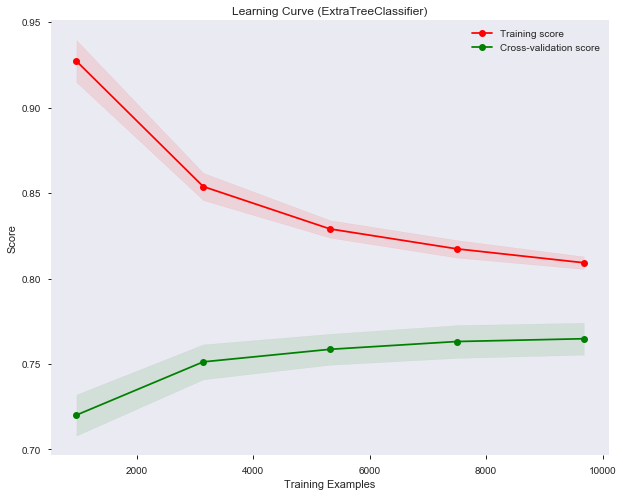

In [53]:
# Plotting learning curve
title = 'Learning Curve (ExtraTreeClassifier)'
# cross validation with 50 iterations to have a smoother curve
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
model = etc
plot_learning_curve(model,title,Xt, yt, n_jobs=-1,ylim=None,cv=cv)
plt.show()

**Random Forest**

In [54]:
# Setting parameters
x_data, x_test_data, y_data, y_test_data = train_test_split(Xt, yt, test_size = 0.3)
rf_para = [{'n_estimators':[50, 100], 'max_depth':[5,10,15], 'max_features':[0.1, 0.3], \
           'min_samples_leaf':[1,3], 'bootstrap':[True, False]}]

In [55]:
rfc = GridSearchCV(RandomForestClassifier(), param_grid=rf_para, cv = 10, n_jobs=-1)
rfc.fit(x_data, y_data)
rfc.best_params_
rfc.cv_results_

{'mean_fit_time': array([0.46478739, 1.30764554, 0.64591076, 1.04099395, 0.8897346 ,
        2.04275398, 0.96285546, 1.53829768, 0.74992561, 1.68455393,
        0.7731272 , 1.85473256, 1.91653335, 3.60968871, 1.52261772,
        2.19912887, 0.75325949, 1.24464576, 0.58883507, 1.53057845,
        1.79713631, 3.88672223, 1.40720184, 3.09775755, 0.47123222,
        1.16663659, 0.62853117, 1.0010988 , 0.85683472, 1.53431859,
        0.79307184, 2.19315264, 0.66370788, 1.3900938 , 0.69761114,
        1.82212796, 1.85698867, 5.39042327, 2.90605712, 4.80389683,
        1.05333066, 2.99986484, 1.46588666, 2.86405213, 2.44360816,
        4.55250254, 2.18503203, 5.19926772]),
 'std_fit_time': array([0.04354547, 0.48900406, 0.11282941, 0.09829662, 0.03865249,
        0.50592772, 0.06857085, 0.23690804, 0.12700324, 0.05617977,
        0.1357627 , 0.61158982, 0.50084919, 0.25108836, 0.21422267,
        0.10012529, 0.05746926, 0.02606987, 0.02147983, 0.34837747,
        0.14661297, 0.16930388, 0.199

In [56]:
print ('Best accuracy obtained: {}'.format(rfc.best_score_))
print ('Parameters:')
for key, value in rfc.best_params_.items():
    print('\t{}:{}'.format(key,value))

Best accuracy obtained: 0.8492972717609543
Parameters:
	bootstrap:False
	max_depth:15
	max_features:0.3
	min_samples_leaf:1
	n_estimators:100


In [57]:
# Best params: {'max_features': 0.3, 'n_estimators': 100, 'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1}
RFC = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=0.3, bootstrap=True, min_samples_leaf=1,\
                             n_jobs=-1)
RFC.fit(Xt, yt)
# y_pred = RFC.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

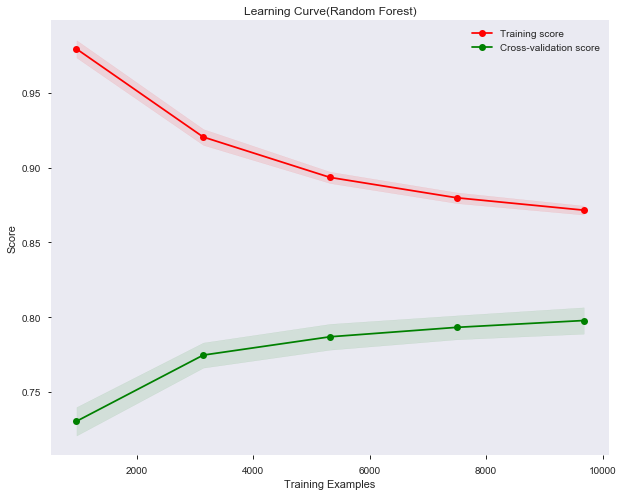

In [58]:
# Plotting Learning Curve
title = 'Learning Curve(Random Forest)'
model = RFC
cv = ShuffleSplit(n_splits=50, test_size=0.2,random_state=0)
plot_learning_curve(model,title,Xt, yt, n_jobs=-1,ylim=None,cv=cv)
plt.show()

**CONCLUSION**
- Accuracy with SupportVectorClassifier 0.7984457671957672
- Accuracy with ExtraTreesClassifier 0.8022486772486772
- Accuracy with RandomForestClassifier 0.8492972717609543

**FUTURE SCOPE**
- PCA - SVM classifier would perform better with compression techniques like PCA